In [1]:
import sys
import os
simulation_path = r"C:\Users\Simon\Google Drive\PhD\code\simulations\MD_stochastic_chain\Classy_for_github"

sys.path.insert(0, simulation_path)

from Simulation import Simulation
from Model import TrappedSquareLatticeElastic
from Data import Data
import numpy as np
import matplotlib.pyplot as plt


tools_path = "C:/Users/Simon/Google Drive/PhD/code/tools"
sys.path.insert(0, tools_path)
from plotting_functions import ybin_in_x,y_and_x_bin_in_z

import pandas as pd

In [2]:

save_path = "D:/PhD/Data/Simulations/Testing_lattice/"


k = 14761.
k_theta = 1048.
trun = 0.01

(N_width, N_height, M_width, M_height) = (5, 5, 9, 9)

e_percent = 3.
u_max = e_percent*(N_height-1)*M_height/100
u_min = 0.

sim_name = "tsting_lattice_"+str(N_width)+"x"+str(N_height)+"_trun_" + \
    str(int(trun))+"_e_"+str(int(e_percent))

input_lattice = {"N_width": N_width, "N_height": N_height, "M_width": M_width, "M_height": M_height,
                 "lattice0type": "unit_square", "gamma": 1., "kT": 1.}

lattice_elastic_input = {"k": k, "k_theta": k_theta, "d0": 1., "sigma_theta0": 0.}

lattice_elastic_input.update(input_lattice)

simulation_parameters = {"time_step": (1/2**16.),
                         "nmb_of_datapoints": 100,
                         "run_time": trun}

mobile_trap_parameters = {"traptype": "linear",
                          "tstart": 0,
                          "tend": trun,
                          "amplitude": u_max-u_min
                          }


model_input = {"lattice_elastic_input": lattice_elastic_input,
               "mobile_trap_parameters": mobile_trap_parameters}


test_sim = Simulation(save_path, sim_name)

test_sim.set_parameters(**simulation_parameters)
test_sim.define_model(model_name="trapped_square_lattice_elastic", model_input=model_input)
test_sim.run_simulation()
# test_sim.analyse.calculate_observables(dst_based_on_deflection=True,safe=True)
# test_sim.visualise.movie(dpi=200)


>>>>>>>>>> Simulation tsting_lattice_5x5_trun_0_e_3 <<<<
starting simulation with parameters: 
time_step : 1.52587890625e-05
steps : 655
run_time : 0.01
nmb_of_datapoints : 100
write_interval : 6
actual_nmb_of_datapoints : 110
and using the following model:
L0_trap_right : 36
M_width : 9
kT : 1.0
gamma : 1.0
tstart : 0
d0 : 1.0
N_width : 5
tend : 0.01
sigma_theta0 : 0.0
lattice0type : unit_square
M_height : 9
amplitude : 1.08
traptype : linear
L0_trap_top : 36
k : 14761.0
k_theta : 1048.0
model_name : trapped_square_lattice_elastic
N_height : 5
production time: 3
particle data 000for this simulation type saved
no theta data for this simulation type
no trap data for this simulation type
no d data for this simulation type
vertical and horizontal chain particle 000 data for this simulation type saved
data saved


In [3]:


savepath = "D:/PhD/Data/Simulations/Testing_lattice/"
sim_name = "tsting_lattice_5x5_trun_0_e_3"
test_sim = Simulation(savepath, sim_name)
test_sim.data.data_load(
                  take_every=1,
                  particle=True,
                  theta=False,
                  observables=False,
                  observables_vs_u=False,
                  string_to_array=False,
                  trap=False,
                    untill_save_nmb=1)

>>>>>>>>>> Simulation tsting_lattice_5x5_trun_0_e_3 <<<<


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


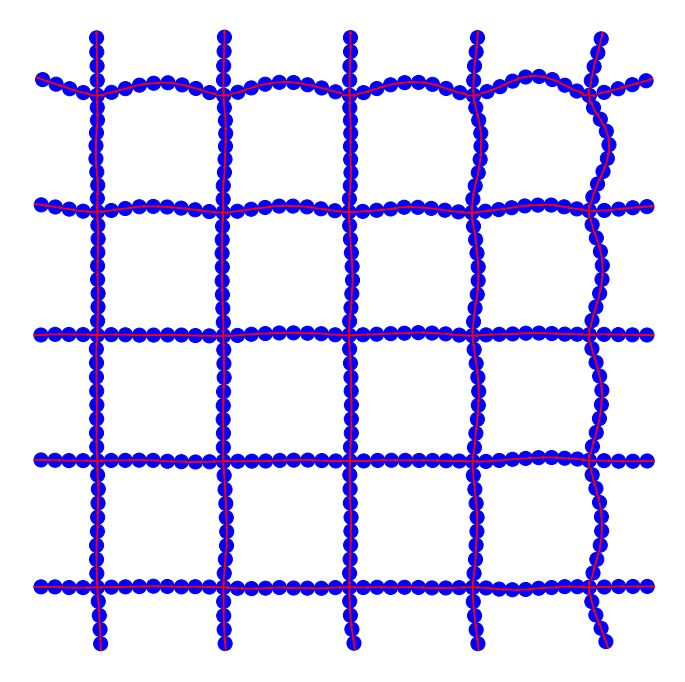

In [4]:
times = test_sim.data.df_particle["time"].unique()
[N_width, N_height, M_width, M_height] = test_sim.data.df_parameters.loc["value",
                                                ["N_width", "N_height", "M_width", "M_height"]].values
width=N_width*M_width
height=N_height*M_height
max_dimension=max(width,height)
pad=0.5
xmin=-M_width/2
ymin=-M_height/2
fig = test_sim.visualise.draw_state(times[-1],xmin=xmin-pad,xmax=xmin+max_dimension+pad,ymin=ymin-pad,show_psi=True,figsize=(9,9))
fig.show()